In [1]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from radiator.figurestyle import *
define_figure_style()


E_ph_interaction_list = np.load('E_effective.npz')['E_ph_interaction_list']
Interaction_fraction = np.load('E_effective.npz')['Interaction_fraction']
Interaction_fraction_H = np.load('E_effective.npz')['Interaction_fraction_H']
Interaction_fraction_He = np.load('E_effective.npz')['Interaction_fraction_He']


[  1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03
   1.00000000e+04   1.00000000e+05   1.00000000e+06   1.00000000e+07
   1.00000000e+08   1.00000000e+09   1.00000000e+10   1.00000000e+11
   1.00000000e+12   1.00000000e+13]
[u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'']
[  1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03
   1.00000000e+04   1.00000000e+05   1.00000000e+06   1.00000000e+07
   1.00000000e+08   1.00000000e+09   1.00000000e+10   1.00000000e+11
   1.00000000e+12   1.00000000e+13]
['$1$', '$10$', '$10^{2}$', '$10^{3}$', '$10^{4}$', '$10^{5}$', '$10^{6}$', '$10^{7}$', '$10^{8}$', '$10^{9}$', '$10^{10}$', '$10^{11}$', '$10^{12}$', '$10^{13}$']
[  1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00
   1.00000000e+01   1.00000000e+02]
[u'', u'', u'', u'', u'', u'']
[  1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00
   1.00000000e+01   1.00000000e+02]
['$10^{-3}$', '$10^{-2}$', '$0.1$', '$

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:31: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:35: RuntimeWarning: invalid value encountered in divide
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:40: RuntimeWarning: invalid value encountered in divide
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:44: RuntimeWarning: invalid value encountered in divide


C:\Anaconda\lib\site-packages\matplotlib\scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


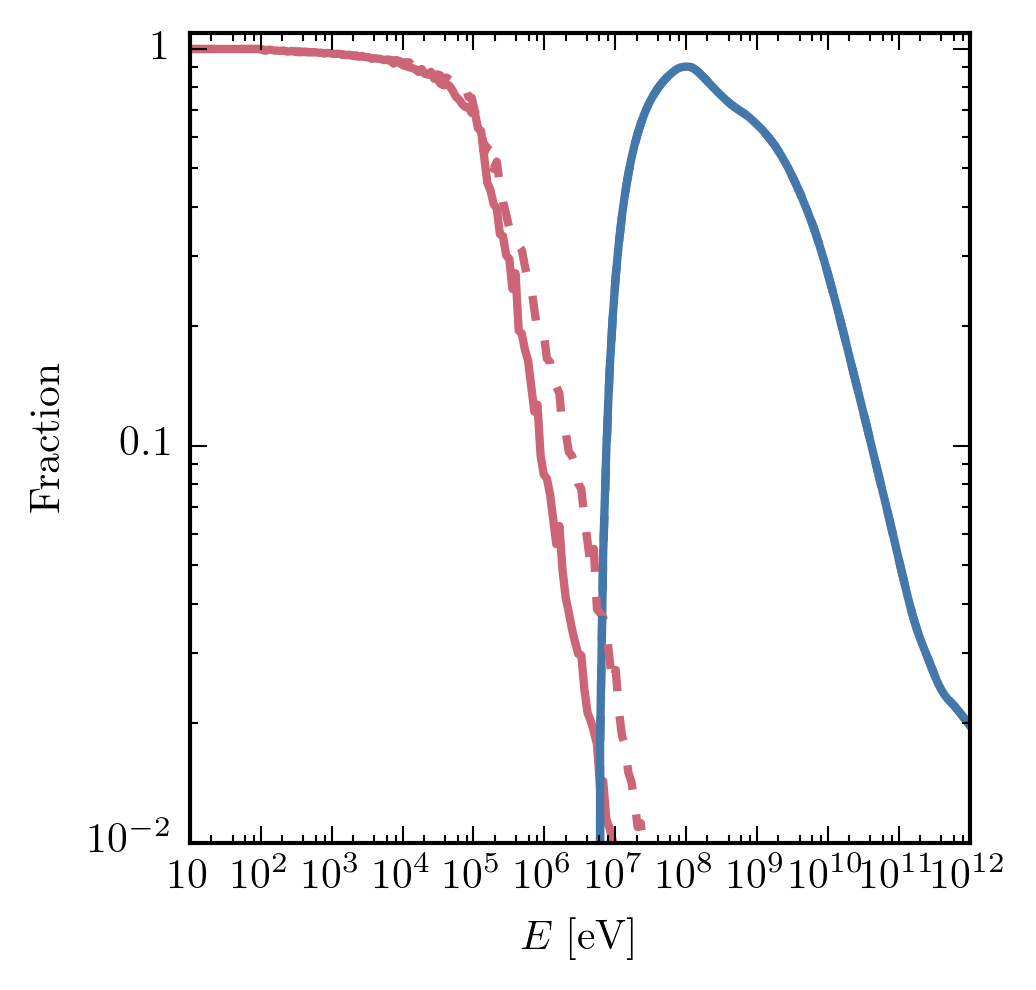

In [4]:


z = 50.0
delta = 0.0
xi = 0.01
q=0
linestyles=['-','--',':']

for name in ['output/00050-0.01000-000000.0-snap_AR_SKD_VFKY1996.npz', 
             'output/00050-0.01000-000000.0-snap_RBEQ_RBEQ_VFKY1996.npz']:

    E_ph_interaction_list = np.load('E_effective.npz')['E_ph_interaction_list']
    Interaction_fraction = np.load('E_effective.npz')['Interaction_fraction']
    Interaction_fraction_H = np.load('E_effective.npz')['Interaction_fraction_H']
    Interaction_fraction_He = np.load('E_effective.npz')['Interaction_fraction_He']

    data = np.load(name)

    E0_list = data['E0_list']
    Eg_list = data['Eg_list']
    EgeV_list = data['EgeV_list']
    results = data['results']
    photons_particles_all = data['photons_particles_all']


    channels = np.zeros(len(E0_list), dtype=([('IC_soft', 'f4'), ('atomic', 'f4'), ('IC_H', 'f4'), ('IC_He', 'f4'), ('IC_tot', 'f4')]))

    for i_E in range(len(E0_list)):
#         print i_E
        channels['IC_soft'][i_E] = 0
        channels['IC_soft'][i_E] = np.sum((photons_particles_all[:, i_E]*Eg_list)[EgeV_list<13.6]) / np.sum((photons_particles_all[:, i_E]*Eg_list))*results['IC'][i_E]
        channels['IC_tot'][i_E] = 0
        for i in range(len(E_ph_interaction_list)-1):
            channels['IC_tot'][i_E] += Interaction_fraction[i] * np.sum((photons_particles_all[:, i_E]*Eg_list)[(EgeV_list>=E_ph_interaction_list[i]) & (EgeV_list<E_ph_interaction_list[i+1])])
        channels['IC_tot'][i_E] /= np.sum((photons_particles_all[:, i_E]*Eg_list))

        channels['IC_H'][i_E] = 0
        for i in range(len(E_ph_interaction_list)-1):
            channels['IC_H'][i_E] += Interaction_fraction_H[i] * np.sum((photons_particles_all[:, i_E]*Eg_list)[(EgeV_list>=E_ph_interaction_list[i]) & (EgeV_list<E_ph_interaction_list[i+1])])
        channels['IC_H'][i_E] /= np.sum((photons_particles_all[:, i_E]*Eg_list))
        channels['IC_He'][i_E] = 0
        for i in range(len(E_ph_interaction_list)-1):
            channels['IC_He'][i_E] += Interaction_fraction_He[i] * np.sum((photons_particles_all[:, i_E]*Eg_list)[(EgeV_list>=E_ph_interaction_list[i]) & (EgeV_list<E_ph_interaction_list[i+1])])
        channels['IC_He'][i_E] /= np.sum((photons_particles_all[:, i_E]*Eg_list))

    channels['atomic'] = results['H_I_ion'] + results['H_I_ex'] + \
                         results['He_I_ion'] + results['He_I_ex'] + \
                         results['He_II_ion'] + results['He_II_ex'] + \
                         results['ee']
    channels['atomic'][channels['atomic']<0]=0
    plt.plot(E0_list, channels['atomic'], linestyles[q], color=mpl.rcParams['axes.color_cycle'][0])
    plt.plot(E0_list, results['IC']*(channels['IC_H'] + channels['IC_He']), linestyles[q], color=mpl.rcParams['axes.color_cycle'][2], lw=2)
    q+=1


plt.xscale('log')
plt.yscale('log')
plt.ylim([0.01,1.1])
fixlogax(plt.gca(), 'x')
fixlogax(plt.gca(), 'y')
plt.xlabel(r'$E\;\mathrm{[eV]}$')
plt.ylabel(r'$\mathrm{Fraction}$')